# Importing the libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Importing the data


In [19]:
dataset = np.loadtxt(fname='data.txt', delimiter=',')
dataset = dataset.reshape(len(dataset), 2)
np.random.shuffle(dataset)
X = dataset[:, 0]      # First column represents the independent variable
y = dataset[:, 1]      # Second column represents the dependent variable

In [20]:
print('dataset\'s shape : ', dataset.shape)
print('X\'s shape : ', X.shape)
print('y\'s shape : ', y.shape)

dataset's shape :  (97, 2)
X's shape :  (97,)
y's shape :  (97,)


# Splitting the data into training and test sets

In [21]:
split_ratio = 0.8  # here we want to split the data into 80%/20% for train/test sets respectively
split_size = int(split_ratio * len(X))

X_train = X[:split_size].reshape((split_size, 1))
X_test = X[split_size:].reshape((len(dataset)-split_size, 1))
y_train = y[:split_size].reshape((split_size, 1))
y_test = y[split_size:].reshape((len(dataset)-split_size, 1))

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(77, 1)
(20, 1)
(77, 1)
(20, 1)


# Visualizing the dataset

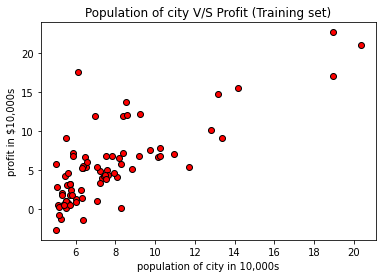

In [23]:
# training data
plt.scatter(X_train, y_train, color='red', edgecolor='black')
plt.xlabel('population of city in 10,000s')
plt.ylabel('profit in $10,000s')
plt.title('Population of city V/S Profit (Training set)')
plt.show()

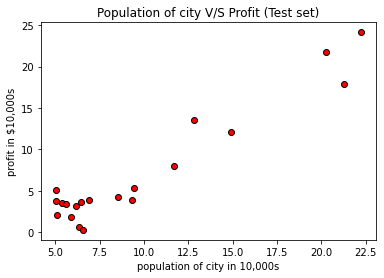

In [33]:
# test data
plt.scatter(X_test, y_test, color='red', edgecolor='black')
plt.xlabel('population of city in 10,000s')
plt.ylabel('profit in $10,000s')
plt.title('Population of city V/S Profit (Test set)')
plt.show()

# building the model

In [25]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

# summary of the model

In [26]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


# Compiling the mode

In [27]:
model.compile(optimizer=tf.compat.v1.train.GradientDescentOptimizer(0.01), loss='mean_squared_error')

# Training the model


In [28]:
history = model.fit(x=X_train, y=y_train, epochs=800, validation_data=(X_test, y_test))

Epoch 1/800
3/3 [==============================] - 0s 50ms/step - loss: 276.8230 - val_loss: 9.4684
Epoch 2/800
3/3 [==============================] - 0s 14ms/step - loss: 14.1687 - val_loss: 16.4274
Epoch 3/800
3/3 [==============================] - 0s 13ms/step - loss: 15.3824 - val_loss: 9.3396
Epoch 4/800
3/3 [==============================] - 0s 13ms/step - loss: 12.8890 - val_loss: 18.3041
Epoch 5/800
3/3 [==============================] - 0s 12ms/step - loss: 18.2504 - val_loss: 8.7361
Epoch 6/800
3/3 [==============================] - 0s 60ms/step - loss: 15.4952 - val_loss: 15.3275
Epoch 7/800
3/3 [==============================] - 0s 13ms/step - loss: 18.2654 - val_loss: 9.1014
Epoch 8/800
3/3 [==============================] - 0s 12ms/step - loss: 14.4359 - val_loss: 25.1873
Epoch 9/800
3/3 [==============================] - 0s 12ms/step - loss: 18.1337 - val_loss: 11.6522
Epoch 10/800
3/3 [==============================] - 0s 15ms/step - loss: 14.0430 - val_loss: 19.3058
Ep

# Retrieving the trained weights and plotting the prediction for both training and test sets

In [29]:
# theta_1 = bias term for the straight line (y-intercept)
# theta_0 = slope of the line
theta_0, theta_1 = model.get_weights()

In [30]:
X = np.column_stack((np.ones((len(X_train), 1)), X_train))
weights = np.array([float(theta_1), float(theta_0)]).reshape((2, 1))
y_pred = np.dot(X, weights)

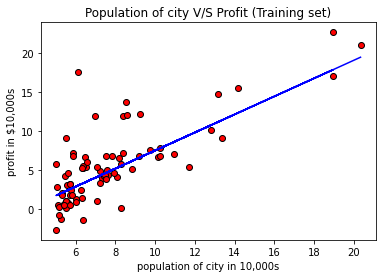

In [31]:
# Training Set
plt.scatter(X_train, y_train, color='red', edgecolor='black')
plt.plot(X_train, y_pred, color='blue')
plt.xlabel('population of city in 10,000s')
plt.ylabel('profit in $10,000s')
plt.title('Population of city V/S Profit (Training set)')
plt.show()

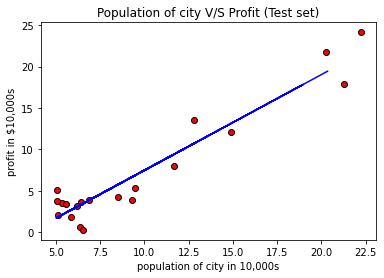

In [32]:
# Test Set
plt.scatter(X_test, y_test, color='red', edgecolor='black')
plt.plot(X_train, y_pred, color='blue')
plt.xlabel('population of city in 10,000s')
plt.ylabel('profit in $10,000s')
plt.title('Population of city V/S Profit (Test set)')
plt.show()